<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula10b_semi_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = X_digits[:1400], X_digits[1400:], y_digits[:1400], y_digits[1400:]

In [2]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
log_reg.fit(X_train[:50], y_train[:50])

LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

In [3]:
log_reg.score(X_test, y_test)

0.7657430730478589

In [4]:
log_reg_full = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.9017632241813602

In [6]:
from sklearn.cluster import KMeans
import numpy as np

k = 50
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

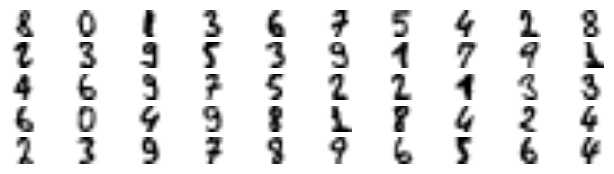

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [8]:
y_representative_digits = np.array([
    8,0,1,3,6,7,5,4,2,8,
    2,3,9,5,3,9,1,7,9,1,
    4,6,9,7,5,2,2,1,3,3,
    6,0,4,9,8,1,8,4,2,4,
    2,3,9,7,8,9,6,5,6,4
])

In [9]:
log_reg = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8337531486146096

In [10]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [11]:
log_reg = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8690176322418136

In [13]:
print((y_train_propagated == y_train).mean())

0.9542857142857143


In [12]:
percentile_closest = 80
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
print(len(X_train_partially_propagated),
      (y_train_partially_propagated == y_train[partially_propagated]).mean())

1111 0.9774977497749775


In [14]:
log_reg = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8790931989924433

#KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train[:50], y_train[:50])
knn.score(X_test, y_test)

0.7027707808564232

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9672544080604534

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_representative_digits, y_representative_digits)
knn.score(X_test, y_test)

0.7858942065491183

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_propagated)
knn.score(X_test, y_test)

0.9546599496221663

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train_partially_propagated, y_train_partially_propagated)
knn.score(X_test, y_test)

0.9521410579345088